In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
x89 = np.load("../data/processed/x_test_section_89.npy")
y89 = np.load("../data/processed/y_test_section_89.npy")

In [19]:
x89.shape, y89.shape

((928, 944, 6), (930, 944))

In [37]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)



def plot_data(channel):
    
    cmap_list = [
         'gray', #GPR Section
         'gray', #Similarity
         'Reds', #Energy
         'seismic', #Inst Frequency
         'seismic', #Inst Phase
         grayscale_cmap('RdBu'), #Hilb/Sim             
    ]

    title_list = [
        'Seção de GPR', 'Similaridade', 'Energia',
        'Frequência Instantânea', 'Fase Instantânea',
        'Traço de Hilbert/Similaridade'
    ]

    fig, ax = plt.subplots(1, 1, figsize = (20,5))

    ax.set_yticks([155, 310, 465, 620, 775])
    ax.set_yticklabels([50, 100, 150, 200, 250])
    ax.set_ylabel("Tempo (ns)")
    ax.set_xticks([410, 820, 1230])
    ax.set_xticklabels([10, 20, 30])
    ax.set_xlabel("Distância (m)")
    ax.set_title(title_list[channel])


    im = ax.imshow(x89[..., channel], cmap = cmap_list[channel])

    fig.colorbar(im, 
                  #ax=ax,
                  #anchor=(0, 0.3),
                 shrink=0.5,
                 fraction = 0.20,
                 use_gridspec=True,
                 pad = 0.015,
                 label = 'Valores normalizados'
                 )
    fig.tight_layout();

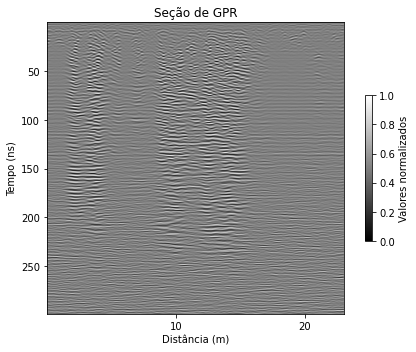

In [38]:
channel = 0

plot_data(channel)

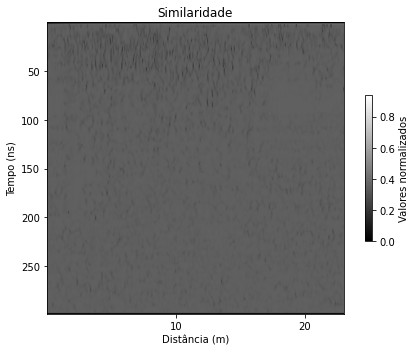

In [39]:
channel = 1

plot_data(channel)

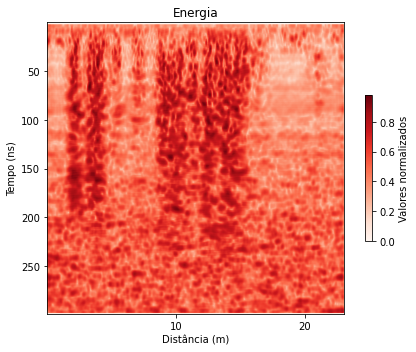

In [40]:
channel = 2

plot_data(channel)

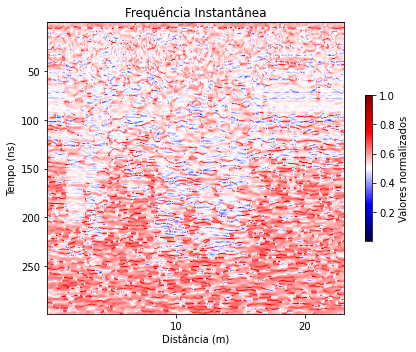

In [41]:
channel = 3

plot_data(channel)

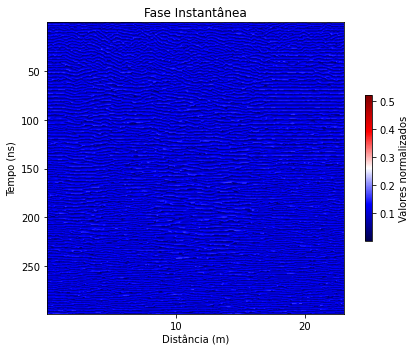

In [42]:
channel = 4

plot_data(channel)

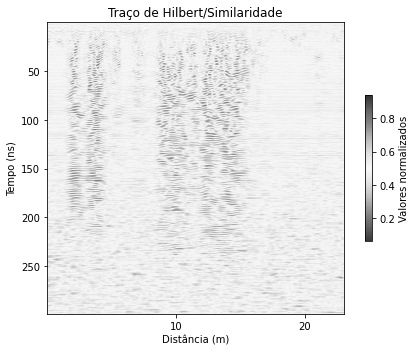

In [43]:
channel = 5

plot_data(channel)

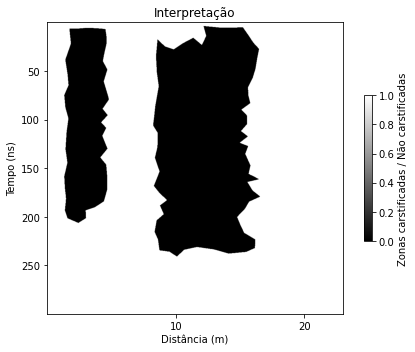

In [49]:
fig, ax = plt.subplots(1, 1, figsize = (20,5))

ax.set_yticks([155, 310, 465, 620, 775])
ax.set_yticklabels([50, 100, 150, 200, 250])
ax.set_ylabel("Tempo (ns)")
ax.set_xticks([410, 820, 1230])
ax.set_xticklabels([10, 20, 30])
ax.set_xlabel("Distância (m)")
ax.set_title('Interpretação' )


im = ax.imshow(y89, cmap = 'gray')

fig.colorbar(im, 
              #ax=ax,
              #anchor=(0, 0.3),
             shrink=0.5,
             fraction = 0.20,
             use_gridspec=True,
             pad = 0.015,
             label = 'Zonas carstificadas / Não carstificadas'
             )
fig.tight_layout();